# Car Detection from Drone Images

## Helpers


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ColabNotebooks/CarDroneViewDataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/labels/02941_jpg.rf.d5f07c35a238a0d816844475eb953032.txt  
  inflating: /content/dataset/train/labels/02941_jpg.rf.fe461a8814bd60c1f98636251b4908d3.txt  
  inflating: /content/dataset/train/labels/02971_jpg.rf.4d392b7777f97ced07a1edda81b6be3f.txt  
  inflating: /content/dataset/train/labels/02971_jpg.rf.ea86561c1e5781a2388006e94e8f8ef0.txt  
  inflating: /content/dataset/train/labels/03001_jpg.rf.140f9fbbeb809e448d60716a5aef6dc2.txt  
  inflating: /content/dataset/train/labels/03001_jpg.rf.7d72a46d084fe27c8d3349cf87223f21.txt  
  inflating: /content/dataset/train/labels/03031_jpg.rf.8ee1c581eecf7d37319eac53e83350bb.txt  
  inflating: /content/dataset/train/labels/03031_jpg.rf.a8b73637e0a3d0f5a7f5d6fce4c33661.txt  
  inflating: /content/dataset/train/labels/030_jpg.rf.881be3a15fb8064f2e9b54e49e1a3f5c.txt  
  inflating: /content/dataset/train/labels/030_jpg.rf.96ff4e0a8351a2c8a20f6735f4deb1f5.txt  
  i

## Load YOLO & Install requirements

In [4]:
# ultralytics for YOLOv8
!pip install ultralytics

# list the dataset folder structure
# !tree /content/dataset

# dataset.yaml file should look like:
# path: /content/dataset
# train: /content/dataset/train/images
# val: /content/dataset/valid/images
# test: /content/dataset/test/images
#
# nc: 1
# names: ['vehicle']

# download pre-trained YOLOv8 nano weights
!mkdir -p /content/weights
!wget -P /content/weights -q https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt

#############
# TRAINING
!yolo train \
  model=/content/weights/yolov8n.pt \
  data=/content/dataset/dataset.yaml \
  epochs=30 \
  imgsz=640

#############
# VALIDATION
!yolo val \
  model=runs/detect/train/weights/best.pt \
  data=/content/dataset/dataset.yaml \
  imgsz=640

#############
# TESTING (INFERENCE)
# Run inference on test images. Detections will be saved to runs/detect/predict.
!yolo detect predict \
  model=runs/detect/train/weights/best.pt \
  source=/content/dataset/test/images \
  imgsz=640 \
  conf=0.25 \
  save_txt=True \
  save_conf=True

/bin/bash: line 1: tree: command not found
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 794 images, 0 backgrounds, 0 corrupt: 100% 794/794 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 50/50 [00:04<00:00, 10.14it/s]
                   all        794       5248      0.969      0.937      0.978      0.731
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/18 /content/dataset/test/images/002_jpg.rf.2a50555873cb5aac7a286818be9d2404.jpg: 544x640 

Primele 3 imagini din folderul 'predict':


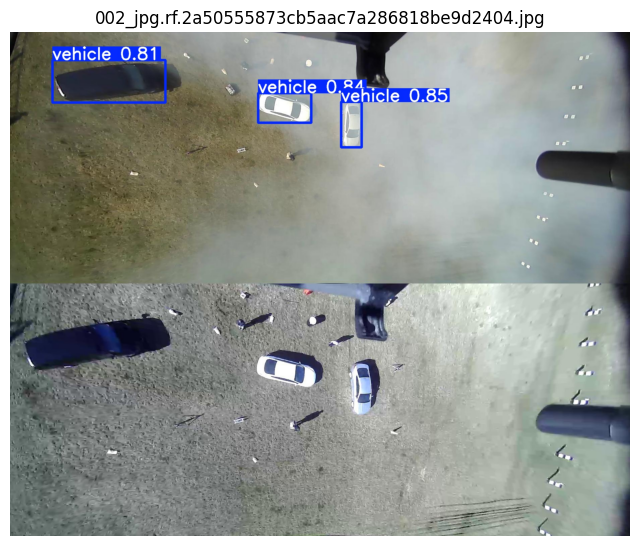

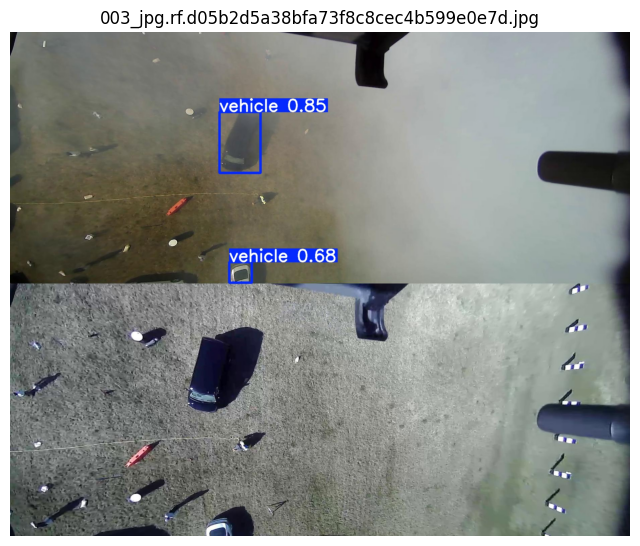

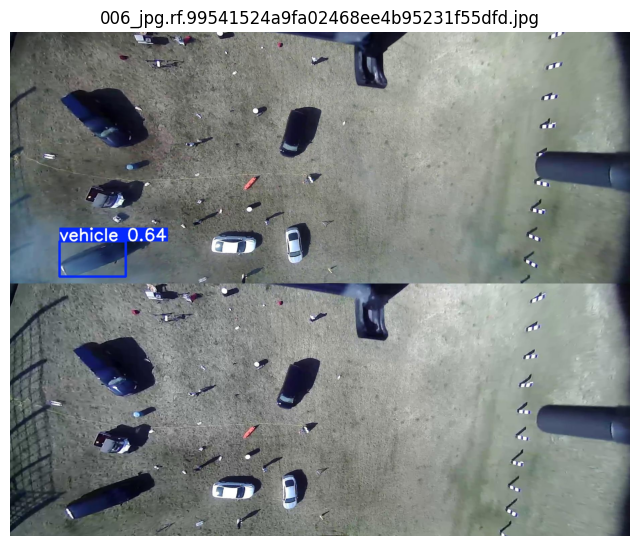

In [10]:
import glob
import os
import cv2
import matplotlib.pyplot as plt

# output first 3 images from predict folder
predict_folder = "runs/detect/predict"
image_files = sorted(glob.glob(os.path.join(predict_folder, "*.jpg")))

print("Primele 3 imagini din folderul 'predict':")
for img_path in image_files[:3]:
    # convertim culoarea din BGR (OpenCV) în RGB
    img = cv2.imread(img_path)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path))
    plt.axis("off")
    plt.show()